# Reading the dataset & Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

# Load the dataset
df=pd.read_csv('ev-charging-stations-india.csv')

In [2]:
df.shape

(1547, 7)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1547 non-null   object 
 1   state      1547 non-null   object 
 2   city       1547 non-null   object 
 3   address    1507 non-null   object 
 4   lattitude  1541 non-null   object 
 5   longitude  1541 non-null   float64
 6   type       1539 non-null   float64
dtypes: float64(2), object(5)
memory usage: 84.7+ KB


# Data Preprocessing

In [4]:
pd.isnull(df).sum()

name          0
state         0
city          0
address      40
lattitude     6
longitude     6
type          8
dtype: int64

In [5]:
#Drop null values and duplicates
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [6]:
# Strip spaces, lowercase everything, and title case
df['state'] = df['state'].str.strip().str.lower().str.title()
df['city'] = df['city'].str.strip().str.lower().str.title()

In [7]:
state_corrections = {
    # Common misspellings and casing
    'Telengana': 'Telangana',
    'Telengana ': 'Telangana',
    'telangana': 'Telangana',
    'Tamilnadu': 'Tamil Nadu',
    'Tamil nadu': 'Tamil Nadu',
    'Taminadu': 'Tamil Nadu',
    'Maharashra': 'Maharashtra',
    'Andra Pradesh': 'Andhra Pradesh',
    'Andrapradesh': 'Andhra Pradesh',
    'Andhrapradesh': 'Andhra Pradesh',
    'Uttarpradesh': 'Uttar Pradesh',
    'UP': 'Uttar Pradesh',
    'MP': 'Madhya Pradesh',
    'Uttrakhand': 'Uttarakhand',
    'Uttarkhand': 'Uttarakhand',
    'DELHI/NCR': 'Delhi',
    'Delhi ': 'Delhi',
    'odisha': 'Odisha',
    'Odisha ': 'Odisha',
    'kerela': 'Kerala',
    'Karala':'Kerala',
    'Rajsthan': 'Rajasthan',
    'gujarat': 'Gujarat',
    'west bengal': 'West Bengal',
    'Westbengal': 'West Bengal',
    'Harayana': 'Haryana',
    
    # City names incorrectly listed under State
    'Hyderabad': 'Telangana',
    'hydrabad': 'Telangana',
    'Hyderabadu00A0': 'Telangana',
    'Chennai': 'Tamil Nadu',
    'Bengaluru': 'Karnataka',
    'Mumbai': 'Maharashtra',
    'Pune': 'Maharashtra',
    'Gurgaon': 'Haryana',
    'Jaipur': 'Rajasthan',
    'Kolkata': 'West Bengal',
    'Lucknow': 'Uttar Pradesh',
    'Ahmedabad': 'Gujarat',
    'Ludhiana': 'Punjab',
    'Cochin': 'Kerala',
    'Rajahmundry': 'Andhra Pradesh',
    'Tirupati': 'Andhra Pradesh',
    'Jammu': 'Jammu And Kashmir',
    'Hyderabad': 'Telangana',
    'Ernakulam': 'Kerala',
    'Hisar': 'Haryana',
    'Bhubhaneswar': 'Odisha',
    'Limbdi': 'Gujarat',
    'Kochi': 'Kerala',
    'Jajpur': 'Rajasthan',
    'Chikhali': 'Maharashtra',

    # Region/state name inconsistencies
    'Andaman': 'Andaman And Nicobar',
    'Jammu & Kashmir': 'Jammu And Kashmir',
    'Delhi/NCR': 'Delhi',
    'Chattisgarh': 'Chhattisgarh',
    'Pondicherry': 'Puducherry',
    'Chandigarh': 'Chandigarh'
}

#Correct City name
city_corrections = {
    'Hydrabad': 'Hyderabad',
    'Hydrabad00AO': 'Hyderabad',
    'Banglore': 'Bangalore',
    'Bengaluru': 'Bangalore',
    'Bangluru': 'Bangalore',
    'Hedrabad': 'Hyderabad',
    'Bangaluru': 'Bangalore',
    "Delhi": "New Delhi"
}

df.replace({'state': state_corrections}, inplace=True)
df.replace({'city': city_corrections}, inplace=True)

In [8]:
# Sort by state and then city alphabetically (case-insensitive), and reset index
df = df.sort_values(by=['state', 'city'], key=lambda col: col.str.lower()).reset_index(drop=True)

# Visualizations
## Number of EV Station in each State

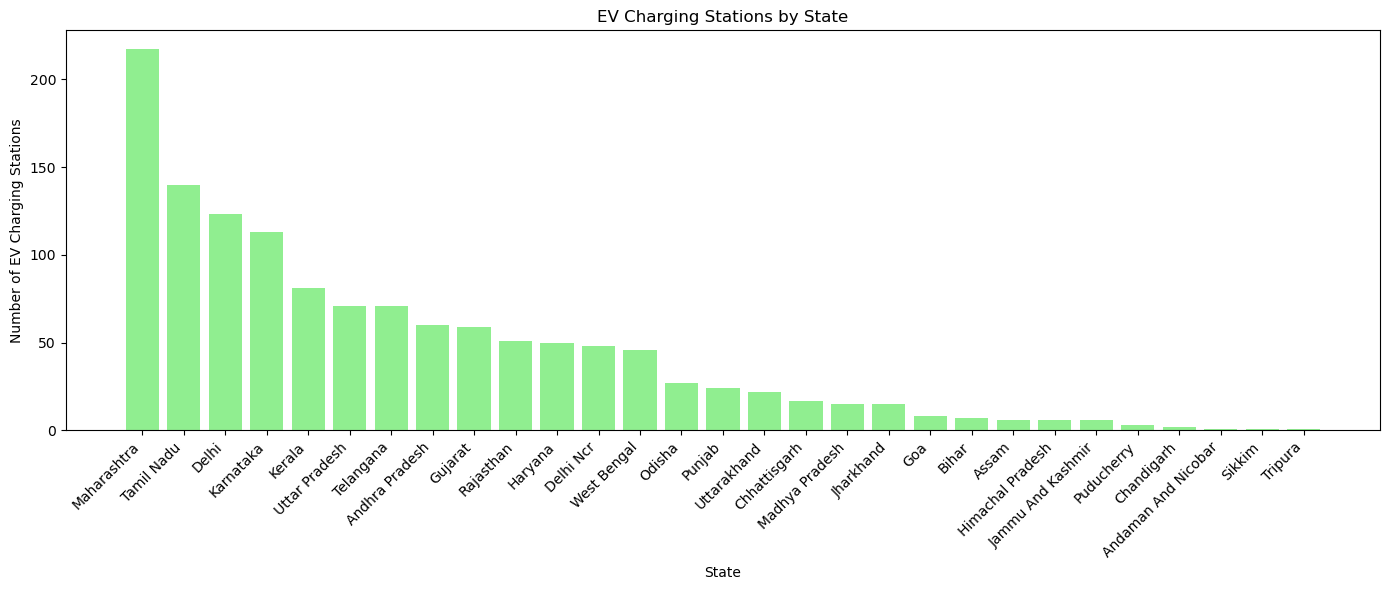

In [9]:
# Count and sort
state_counts = df['state'].value_counts()

# Plot
plt.figure(figsize=(14, 6))
plt.bar(state_counts.index, state_counts.values, color='lightgreen')
plt.xticks(rotation=45, ha='right')
plt.xlabel('State')
plt.ylabel('Number of EV Charging Stations')
plt.title('EV Charging Stations by State')
plt.tight_layout()
plt.show()

## Top 10 cities with maximum charging stations

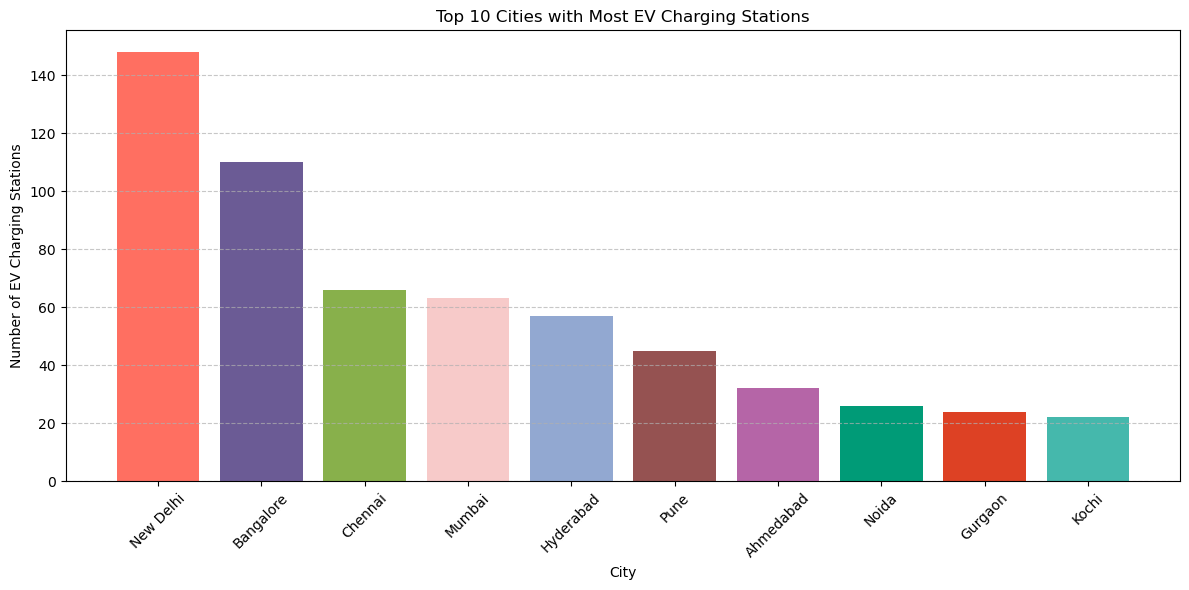

In [10]:
# Count the number of stations in each city (Top 10)
city_counts = df['city'].value_counts().head(10)

# Define a list of 10 vibrant colors
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1',
          '#955251', '#B565A7', '#009B77', '#DD4124', '#45B8AC']

# Plot the bar graph
plt.figure(figsize=(12, 6))
plt.bar(city_counts.index, city_counts.values, color=colors)

plt.xlabel("City")
plt.ylabel("Number of EV Charging Stations")
plt.title("Top 10 Cities with Most EV Charging Stations")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Ten Cities with Lowest Charging Station

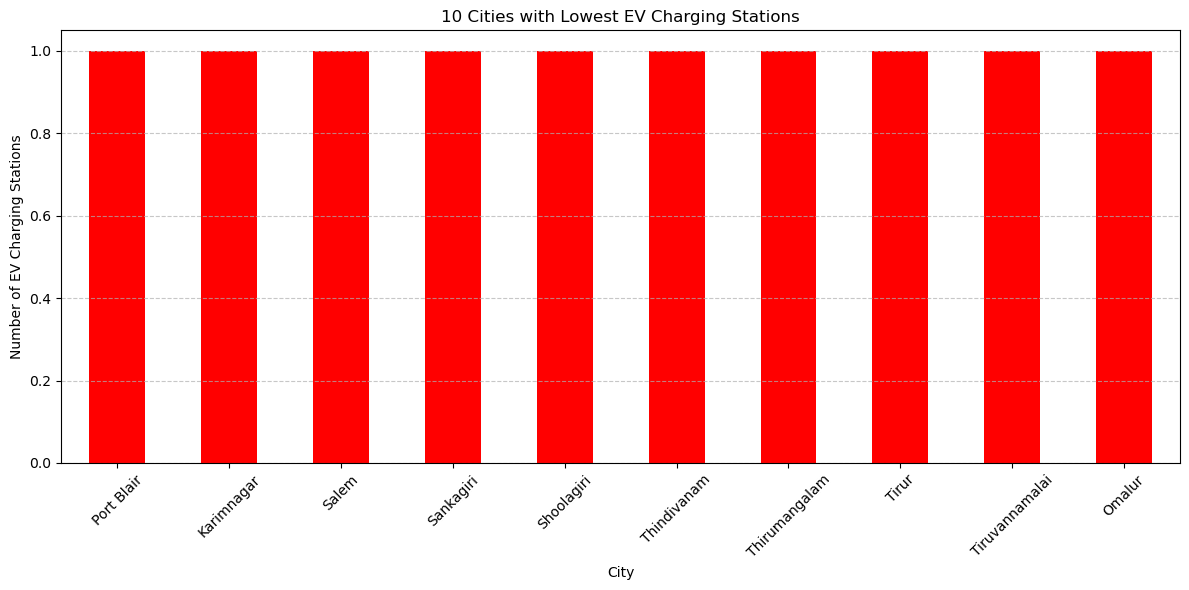

In [11]:
#Count the number of stations in each city
city_counts = df['city'].value_counts().tail(10) 

#Plot the bar graph
plt.figure(figsize=(12, 6))
city_counts.plot(kind='bar', color='red')

plt.xlabel("City")
plt.ylabel("Number of EV Charging Stations")
plt.title("10 Cities with Lowest EV Charging Stations")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Distribution of different types of charging stations

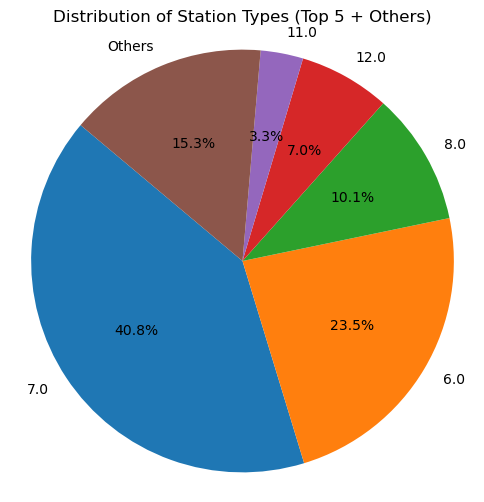

In [12]:
# Count station types
type_counts = df['type'].value_counts()

# Keep only top 5 most common types, rest grouped as 'Others'
top_types = type_counts.nlargest(5)
others_sum = type_counts.iloc[5:].sum()

# Add 'Others' category
final_counts = top_types.copy()
final_counts['Others'] = others_sum

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(final_counts, labels=final_counts.index.astype(str), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Station Types (Top 5 + Others)')
plt.axis('equal')
plt.show()

### Fast vs Slow Station

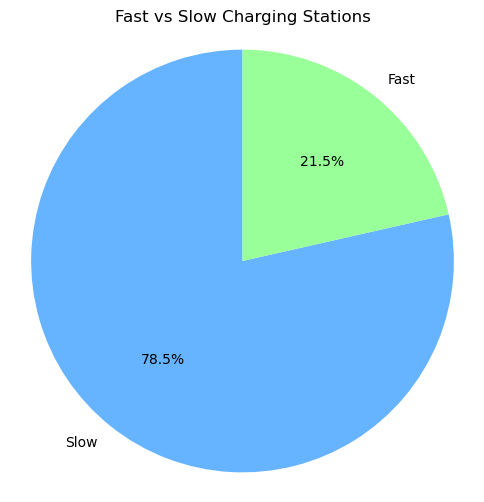

In [13]:
#Define a function to categorize station types as 'Slow' or 'Fast'
def map_type(code):
    if code < 12:
        return 'Slow'
    else:
        return 'Fast'

df['type_category'] = df['type'].apply(map_type)

# Pie chart
type_counts = df['type_category'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Fast vs Slow Charging Stations')
plt.axis('equal')
plt.show()

## Distribution of EV Station among Metro & Non-Metro Cities

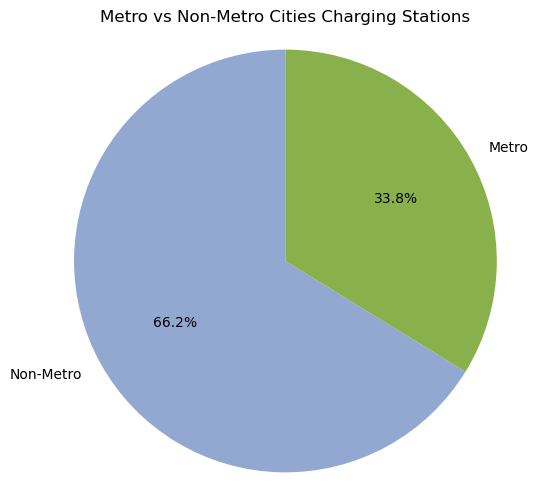

In [14]:
# Define list of metro cities
metro_cities = ['Delhi','New Delhi', 'Mumbai', 'Kolkata', 'Chennai', 'Bengaluru', 'Hyderabad', 'Pune', 'Ahmedabad', 'Surat']

# Create a new column indicating Metro or Non-Metro
df['metro_category'] = df['city'].apply(lambda x: 'Metro' if x in metro_cities else 'Non-Metro')

#Pie chart
metro_counts = df['metro_category'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(metro_counts, labels=metro_counts.index, autopct='%1.1f%%', startangle=90, colors=[ '#92A8D1', '#88B04B'])
plt.title('Metro vs Non-Metro Cities Charging Stations')
plt.axis('equal')
plt.show()

## Top Companies in EV Station

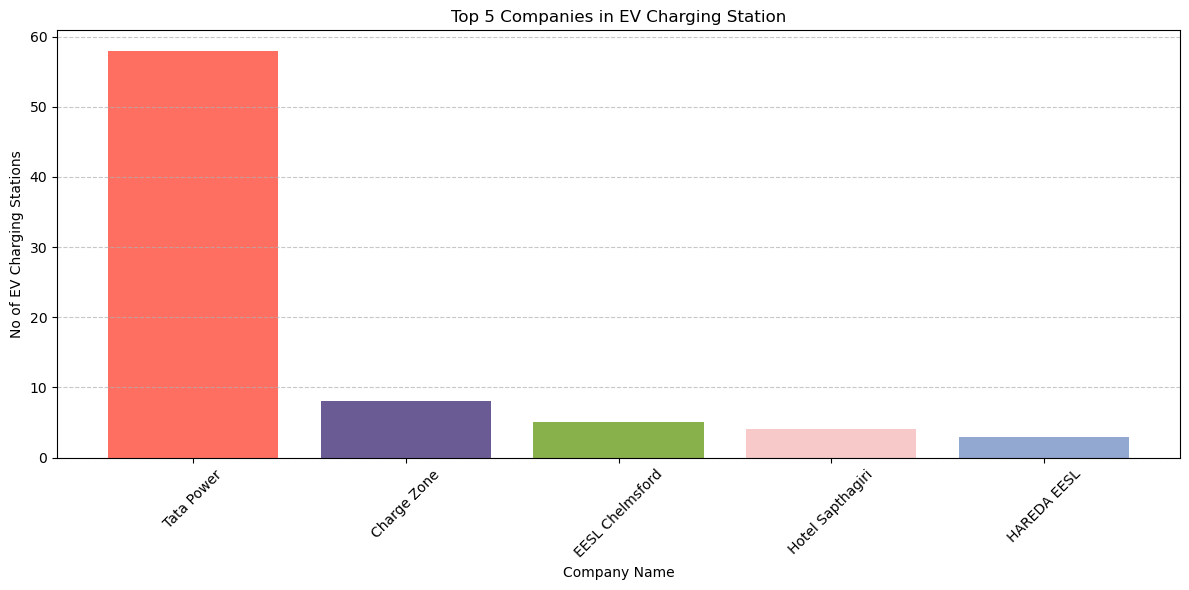

In [20]:
# Count Number of Stations Each Company Has
name_counts = df['name'].value_counts().head(5)

# Plot the bar graph
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1']
plt.figure(figsize=(12, 6))
plt.bar(short_labels, name_counts.values, color=colors)

plt.xlabel("Company Name")
plt.ylabel("No of EV Charging Stations")
plt.title("Top 5 Companies in EV Charging Station")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## Observations from the EV Charging Station Data
-**State-wise distribution**: EV charging stations are not evenly distributed across India. Maharashtra has the highest number, followed by Tamil Nadu and Karnataka.

-**City-wise distribution**: New Delhi tops the list with the most charging stations, followed by Bangalore and Chennai. These are all major metro cities with significant EV adoption.

-**Charging speed**: A majority of stations provide slow charging. This is likely due to the high installation cost and infrastructure requirements of fast chargers.

-**Metro vs Non-Metro**: Around 23% of the EV stations are located in metro cities (which are only 9 in number). This reflects a concentration of infrastructure in urban areas.

-**Top companies**: Tata Power is the leading company in terms of the number of EV charging stations installed across India.

The data clearly suggests that demand for EVs and infrastructure is highest in metro cities. To accelerate EV adoption, government policies and private investments should prioritize expanding fast-charging networks in both metro and upcoming Tier-2 cities.



In [21]:
#Save Final Dataset
df.to_csv('cleaned_ev_charging_data.csv',index=False)